# Import and function

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
import warnings

In [104]:
warnings.filterwarnings('ignore')

In [105]:
def plot_cate(column):
    value = df[column].value_counts()
    labels = value.keys()
    sizes = []
    for label in labels:
        sizes.append(value[label])

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution')
    plt.show()
    df_plat= df.groupby([column]).agg(
        {'Exchange_Price': 'mean'}
    ).reset_index()

    df_plat.head()
    sns.barplot(df_plat, x=column,y="Exchange_Price")

In [106]:
def plot_num(column):    
    fig = plt.figure(figsize=(8,6))
    t = sns.distplot(df.loc[:,column], label="Skewness: %.2f \n Kurtosis: %.2f" %(df.loc[:, column].skew(), df.loc[:, column].kurt()))
    t.legend()
    plt.show(fig)

# Loading and process data

In [107]:
df = pd.read_csv("FullDB.csv")
df.shape

(6583, 133)

In [108]:
df.head(5)

,Talk Time,Aux. Camera Extra Functions,Graphical Controller,Display Type,GPU Clock,Resolution,Supported Galileo service(s),SAR (body),Sec. Supported Cellular Data Links,Height,...,Depth,Hardware Designer,Codename,FM Radio Receiver,USB,Focus,Aux. Camera Aperture (W),Aperture (W),Released,Width
0,50.0 hours,NaN,Qualcomm Adreno 619,Color IPS TFT LCD display,NaN,720x1520,E1,NaN,NaN,158 mm,...,9.4 mm,Sharp,NaN,FM radio (76-108 MHz) with RDS,USB 2.0,PD AF,NaN,f/2.00,2022 Oct 28,71 mm
1,NaN,"HDR photo\n, HDR video\n, Burst mode\n, Panora...",Qualcomm Adreno 730,AM-OLED display,NaN,1220x2700,"E1\n, E5a",NaN,"GPRS\n, EDGE\n, UMTS\n, HSUPA\n, HSUPA 5.8\n, ...",161 mm,...,8.3 mm,Huawei,Huawei Mona Lisa,No,USB 3.0 / 3.1 Gen 1 / 3.2 Gen 1x1,"CD AF\n, PD AF\n, Laser AF",f/2.20,f/1.40,2023 Mar,74.5 mm
2,1.5 hours,NaN,NaN,AM-OLED display,NaN,368x448,E1,NaN,NaN,44 mm,...,10.7 mm,Apple,"Apple Watch 6,2",No,No,No,NaN,NaN,2020 Sep 18,38 mm
3,41.0 hours,"Burst mode\n, Macro mode",ARM Mali-G57MP2,Color PLS TFT LCD display,955 MHz,1080x2408,E1,0.480 W/kg,NaN,167.7 mm,...,9.1 mm,Samsung Electronics,Samsung A146,No,USB 2.0,PD AF,f/2.40,f/1.80,2023 May,78 mm
4,NaN,"HDR photo\n, Burst mode\n, Macro mode",PowerVR GE8320,Color IPS TFT LCD display,600 MHz,720x1600,E1,NaN,"GPRS\n, EDGE\n, UMTS\n, HSUPA\n, HSUPA 5.8\n, ...",163.96 mm,...,8.28 mm,BBK Electronics,NaN,No,USB 2.0,PD AF,NaN,f/2.20,2022 May,75.2 mm


Check duplicated

In [109]:
df.duplicated().sum()

29

In [110]:
df = df.drop_duplicates()
df.shape

(6554, 133)

In [111]:
df = df[df["Device Category"]=="Smartphone"]

In [112]:
columns_of_interest = ["Model",
    "Secondary Display Type", "Wireless Charging", "Platform", "Device Category",
    "Brand", "Touchscreen Type", "CPU", "Number of effective pixels", "Resolution",
    "Pixel Density", "Market Regions", "Zoom", "Display Type",
    "Non-volatile Memory Capacity (converted)", "IR", "RAM Capacity (converted)",
    "Nominal Battery Capacity", "Released", "GPU Clock",
    "Display Refresh Rate", "CPU Clock", "Video Recording",
    "Bluetooth", "Sec. SIM Card Slot", "Mass", "Depth",
    "Width", "Height", "Price", "currency"
]

In [113]:
df = df[columns_of_interest]
df.shape

(5928, 31)

Process data type

In [114]:
for index, row in df.iterrows():
    if pd.isna(row["Secondary Display Type"]):
        df.at[index, "Secondary Display Type"] = False
    else:
        df.at[index, "Secondary Display Type"] = True
    if pd.isna(row["Wireless Charging"]):
        df.at[index, "Wireless Charging"] = False
    else:
        df.at[index, "Wireless Charging"] = True
    if pd.isna(row["IR"]):
        df.at[index, "IR"] = False
    else:
        df.at[index, "IR"] = True
    if pd.isna(row["Touchscreen Type"]):
        df.at[index, "Touchscreen Type"] = False
    else:
        df.at[index, "Touchscreen Type"] = True
    df.at[index, "Number of effective pixels"] = str(df.at[index, "Number of effective pixels"])
    df.at[index, "Number of effective pixels"] = float(df.at[index, "Number of effective pixels"].split(' ')[0])
    if pd.isna(row["Pixel Density"]):
        df.at[index, "Pixel Density"] = 0
    else:
        df.at[index, "Pixel Density"] = int(str(df.at[index, "Pixel Density"]).split(' ')[0])
    df.at[index, "Market Regions"] = str(str(df.at[index, "Market Regions"]))
    df.at[index, "Market Regions"] = df.at[index, "Market Regions"].split('\n')[0]
    df.at[index, "Zoom"] = float(str(df.at[index, "Zoom"]).split(' ')[0])
    if pd.isna(row["Non-volatile Memory Capacity (converted)"]):
        df.at[index, "Non-volatile Memory Capacity (converted)"] = 0
    else:
        df.at[index, "Non-volatile Memory Capacity (converted)"] = float(str(df.at[index, "Non-volatile Memory Capacity (converted)"]).split(' ')[0])
    
    if pd.isna(row["RAM Capacity (converted)"]):
        df.at[index, "RAM Capacity (converted)"] = 0
    else:
        df.at[index, "RAM Capacity (converted)"] = float(str(df.at[index, "RAM Capacity (converted)"]).split(' ')[0])
    
    if pd.isna(row["Nominal Battery Capacity"]):
        df.at[index, "Nominal Battery Capacity"] = 0
    else:
        df.at[index, "Nominal Battery Capacity"] = int(str(df.at[index, "Nominal Battery Capacity"]).split(' ')[0])
    
    df.at[index, "Released"] = ' '.join(str(df.at[index, "Released"]).split()[0:2])
    if pd.isna(row["Released"]):
        df.at[index, "Released"] = 0
    else:
        df.at[index, "Released"] = pd.to_datetime(row["Released"], errors='coerce')
    if pd.isna(row["GPU Clock"]):
        df.at[index, "GPU Clock"] = 0
    else:
        df.at[index, "GPU Clock"] = str(df.at[index, "GPU Clock"])
        df.at[index, "GPU Clock"] = int(df.at[index, "GPU Clock"].split(' ')[0])
    if pd.isna(row["Display Refresh Rate"]):
        df.at[index, "Display Refresh Rate"] = 0
    else:
        df.at[index, "Display Refresh Rate"] = int(str(df.at[index, "Display Refresh Rate"]).split(' ')[0])
    
    if pd.isna(row["CPU Clock"]):
        df.at[index, "CPU Clock"] = 0
    else:
        if not isinstance(df.at[index, "CPU Clock"], int):
            df.at[index, "CPU Clock"] = float(str(df.at[index, "CPU Clock"]).split(' ')[0])
    df.at[index, "Video Recording"] = str(df.at[index, "Video Recording"]).split(' ')[0]
    df.at[index, "Bluetooth"] = str(df.at[index, "Bluetooth"])
    if pd.isna(row["Sec. SIM Card Slot"]):
        df.at[index, "Sec. SIM Card Slot"] = False
    else:
        df.at[index, "Sec. SIM Card Slot"] = True
    df.at[index, "Mass"] = float(str(df.at[index, "Mass"]).split(' ')[0])
    df.at[index, "Depth"] = float(str(df.at[index, "Depth"]).split(' ')[0])
    df.at[index, "Width"] = float(str(df.at[index, "Width"]).split(' ')[0])
    df.at[index, "Height"] = float(str(df.at[index, "Height"]).split(' ')[0])
    df.at[index, "Price"] = float(df.at[index, "Price"])

In [115]:
df = df.dropna(subset=["Price"])
df['Market Regions'] = df['Market Regions'].replace('nan', pd.NA)
df = df[df["Bluetooth"] != "Yes"]

In [116]:
df.shape

(3964, 31)

Drop NaN records

In [117]:
df = df.dropna()
df.shape

(3949, 31)

Fill NaN value

In [118]:
df_pixel = df[df["Pixel Density"] != 0]
df_pixel.shape

(3949, 31)

In [119]:
df_hz = df[df["Display Refresh Rate"] != 0]
df_hz.shape

(3264, 31)

In [120]:
hz_mode = df_hz["Display Refresh Rate"].mode()
hz_mode

0    120
Name: Display Refresh Rate, dtype: object

In [121]:
df_rom = df[df["Non-volatile Memory Capacity (converted)"] != 0]
df_rom.shape

(3949, 31)

In [122]:
df_bat = df[df["Nominal Battery Capacity"] != 0]
df_bat.shape

(3947, 31)

In [123]:
bat_mean = df_bat["Nominal Battery Capacity"].mean()
bat_mean

4596.232328350646

In [124]:
df_cpu = df[df["CPU Clock"] != 0]
df_cpu.shape

(3936, 31)

In [125]:
cpu_mean = df_cpu["CPU Clock"].mean()
cpu_mean

2557.018800813008

In [126]:
for index, row in df.iterrows():
     if df.at[index, "Display Refresh Rate"] == 0:
          df.at[index, "Display Refresh Rate"] = 120
     if df.at[index, "CPU Clock"] == 0:
          df.at[index, "CPU Clock"] = float(cpu_mean)
     if df.at[index, "Nominal Battery Capacity"] == 0:
          df.at[index, "Nominal Battery Capacity"] = float(bat_mean)

## Currency Exchange

In [127]:
unique_currencies = df['currency'].unique()

print(unique_currencies)

['JPY' 'CNY' 'USD' 'EUR' 'INR' 'MYR' 'THB' 'IDR' 'HKD' 'MXN' 'RUB' 'KRW'
 'GBP' 'KZT' 'CAD' 'BRL' 'TWD' 'TRY' 'AUD' 'CHF' 'AED' 'VND' 'SGD' 'PLN'
 'HUF' 'ARS']


In [128]:
exchange_rates = {'JPY': 0.0091, 'CNY': 0.1572, 'USD': 1.0, 'EUR': 1.1845, 'INR': 0.0134, 'MYR': 0.2409, 'THB': 0.0306, 'IDR': 0.0000712, 'HKD': 0.1284, 'MXN': 0.0496, 'RUB': 0.0136,
                  'KRW': 0.000887, 'AED': 0.2723, 'GBP': 1.3841, 'KZT': 0.0023, 'CAD': 0.8012, 'BRL': 0.1862, 'TWD': 0.0357, 'TRY': 0.1104, 'AUD': 0.7388, 'CHF': 1.0964, 'VND': 0.0000435,
                  'SGD': 0.7423, 'PLN': 0.2605, 'HUF': 0.0033, 'ARS': 0.0098}

df['Exchange Rate'] = df['currency'].map(exchange_rates)

df['Exchange_Price'] = df['Price'] * df['Exchange Rate']


df = df.drop('Exchange Rate', axis=1)
df["new_currency"]="USD"

In [129]:
df.head(5)

,Model,Secondary Display Type,Wireless Charging,Platform,Device Category,Brand,Touchscreen Type,CPU,Number of effective pixels,Resolution,...,Bluetooth,Sec. SIM Card Slot,Mass,Depth,Width,Height,Price,currency,Exchange_Price,new_currency
0,Basio active 5G TD-LTE JP 64GB SHG09,False,False,Android,Smartphone,Sharp,True,"Qualcomm Snapdragon 695 5G SM6375, 2021, 64 bi...",12.0,720x1520,...,Bluetooth 5.1,False,174.0,9.4,71.0,158.0,51500.00,JPY,468.6500,USD
1,P60 Pro 4G Premium Edition Dual SIM TD-LTE CN ...,False,True,Android,Smartphone,Huawei,True,Qualcomm Snapdragon 8+ Gen 1 4G SM8475 (Palima...,48.0,1220x2700,...,Bluetooth 5.2,True,200.0,8.3,74.5,161.0,7998.00,CNY,1257.2856,USD
3,SM-A146U Galaxy A14 5G 2023 Standard Edition T...,False,False,Android,Smartphone,Samsung,True,"MediaTek Dimensity 700 MT6833V/ZA, 2020, 64 bi...",50.1,1080x2408,...,Bluetooth 5.2,False,204.0,9.1,78.0,167.7,199.99,USD,199.9900,USD
4,Vivo Y01 2022 Premium Edition Dual SIM TD-LTE ...,False,False,Android,Smartphone,BBK,True,"MediaTek Helio P35 MT6765, 2018, 64 bit, octa-...",13.0,720x1600,...,Bluetooth 5.0,True,178.0,8.28,75.2,163.96,149.00,EUR,176.4905,USD
5,Realme 9 Pro+ 5G 2022 Premium Edition Dual SIM...,False,False,Android,Smartphone,Oppo,True,"MediaTek Dimensity 920 MT6877V/TZA, 2022, 64 b...",50.3,1080x2400,...,Bluetooth 5.2,True,182.0,7.99,73.3,160.2,26999.00,INR,361.7866,USD


In [130]:
df.drop(columns=["Price", "currency", "new_currency"], inplace=True)

# EDA

## Price

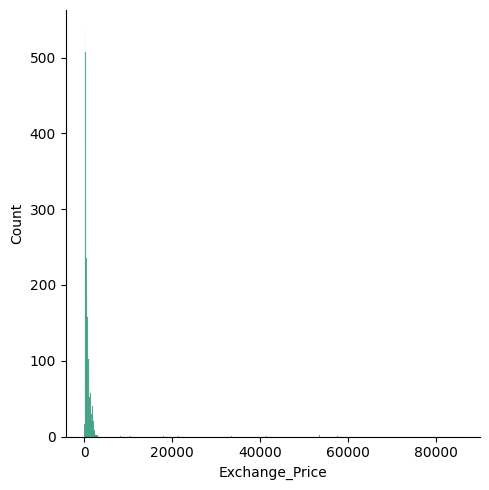

In [131]:
sns.displot(df["Exchange_Price"])

In [132]:
df = df[df["Exchange_Price"] < 2500]
df.shape

(3918, 30)

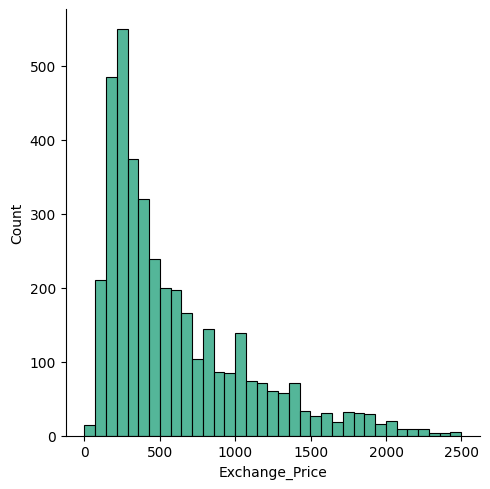

In [133]:
sns.displot(df["Exchange_Price"])

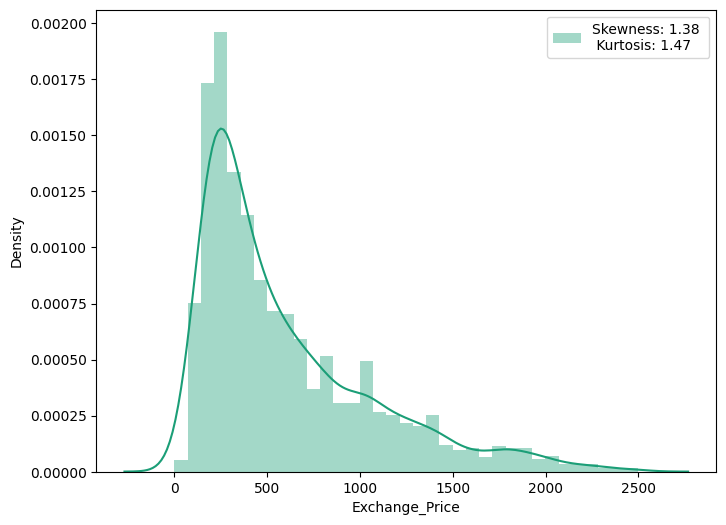

In [134]:
plot_num("Exchange_Price")

## Secondary Display Type

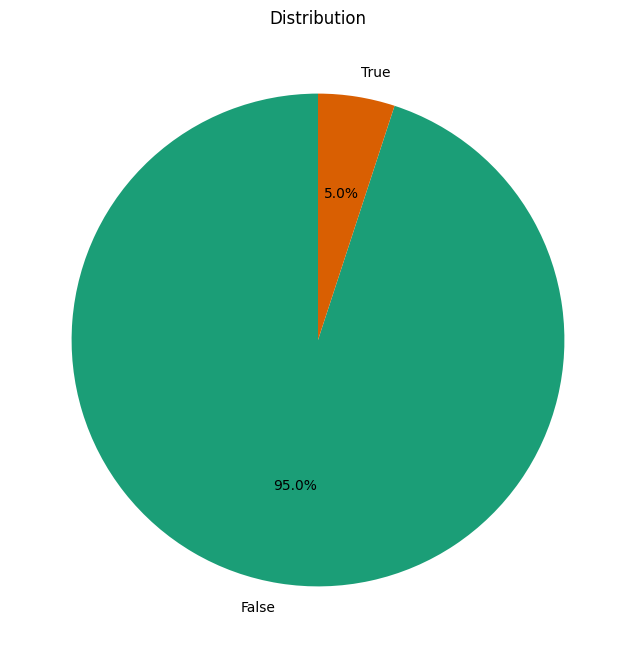

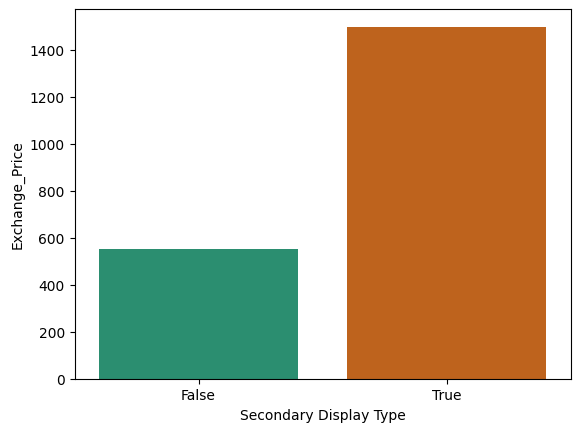

In [135]:
plot_cate(column="Secondary Display Type")

## Wireless Charging

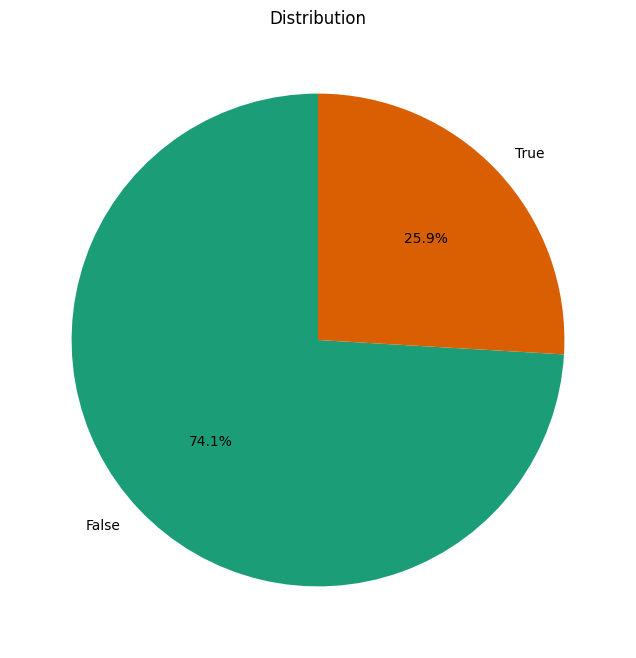

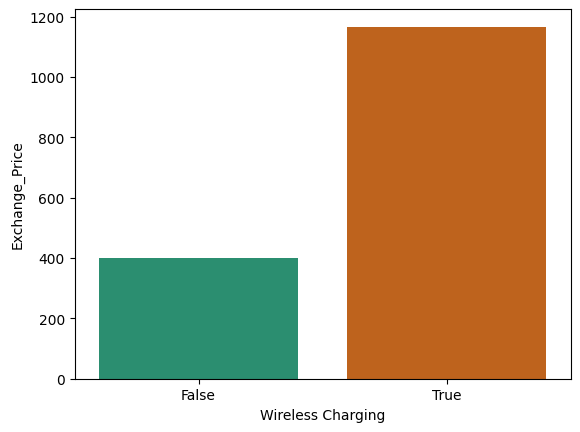

In [136]:
plot_cate(column="Wireless Charging")

## Platform

In [137]:
df["Platform"].value_counts()

Android         3699
iOS / iPadOS     219
Name: Platform, dtype: int64

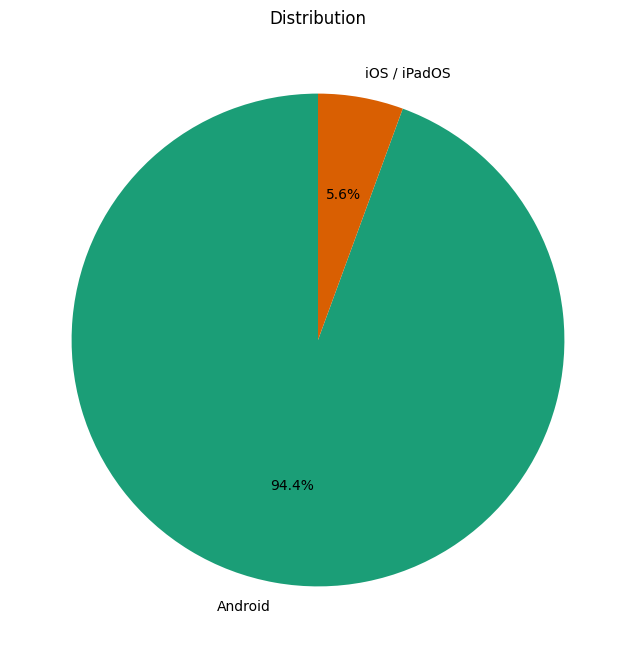

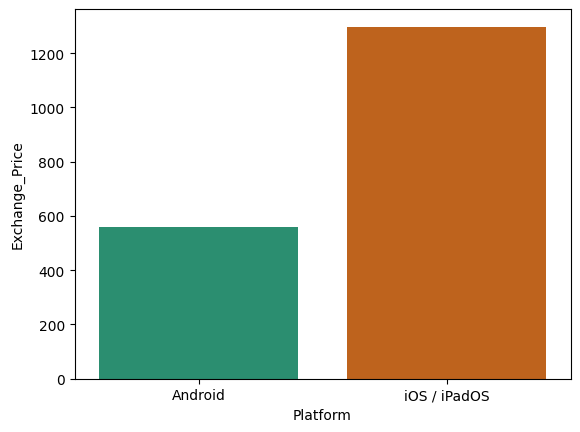

In [138]:
plot_cate(column="Platform")

## Region

In [139]:
df["Market Regions"].value_counts()

Asia               2628
North America       646
Africa              373
Central America      80
Eastern Europe       75
Australia            60
South America        31
Europe               24
Southeast Asia        1
Name: Market Regions, dtype: int64

In [140]:
df['Market Regions'] = df['Market Regions'].replace('nan', pd.NA)
df.dropna(subset=["Exchange_Price","Market Regions"],inplace=True)

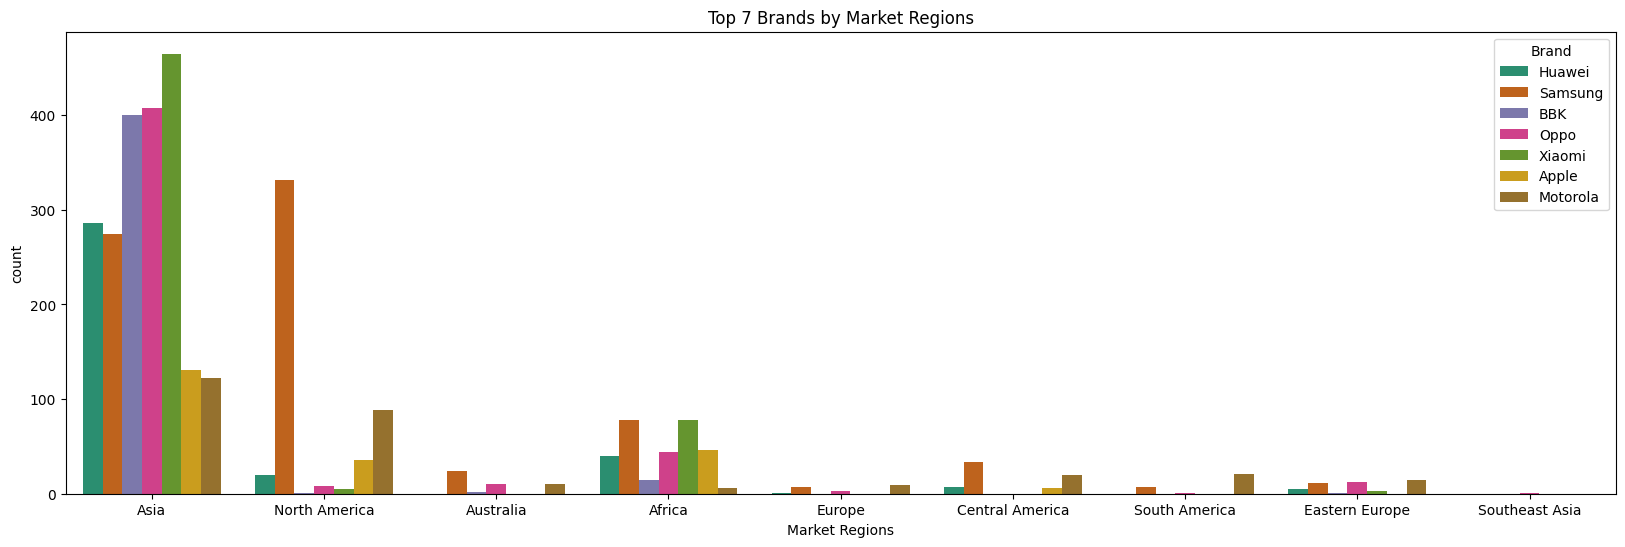

In [141]:
brand_counts = df['Brand'].value_counts()
top_10_brands = brand_counts.head(7).index
df_top_10 = df[df['Brand'].isin(top_10_brands)]
sns.set_palette("Dark2")

plt.figure(figsize=(20, 6))
sns.countplot(x='Market Regions', hue='Brand', data=df_top_10)
plt.title('Top 7 Brands by Market Regions')
plt.show()

In [142]:
df["Market Regions"]=df["Market Regions"].replace('Southeast Asia','Asia')

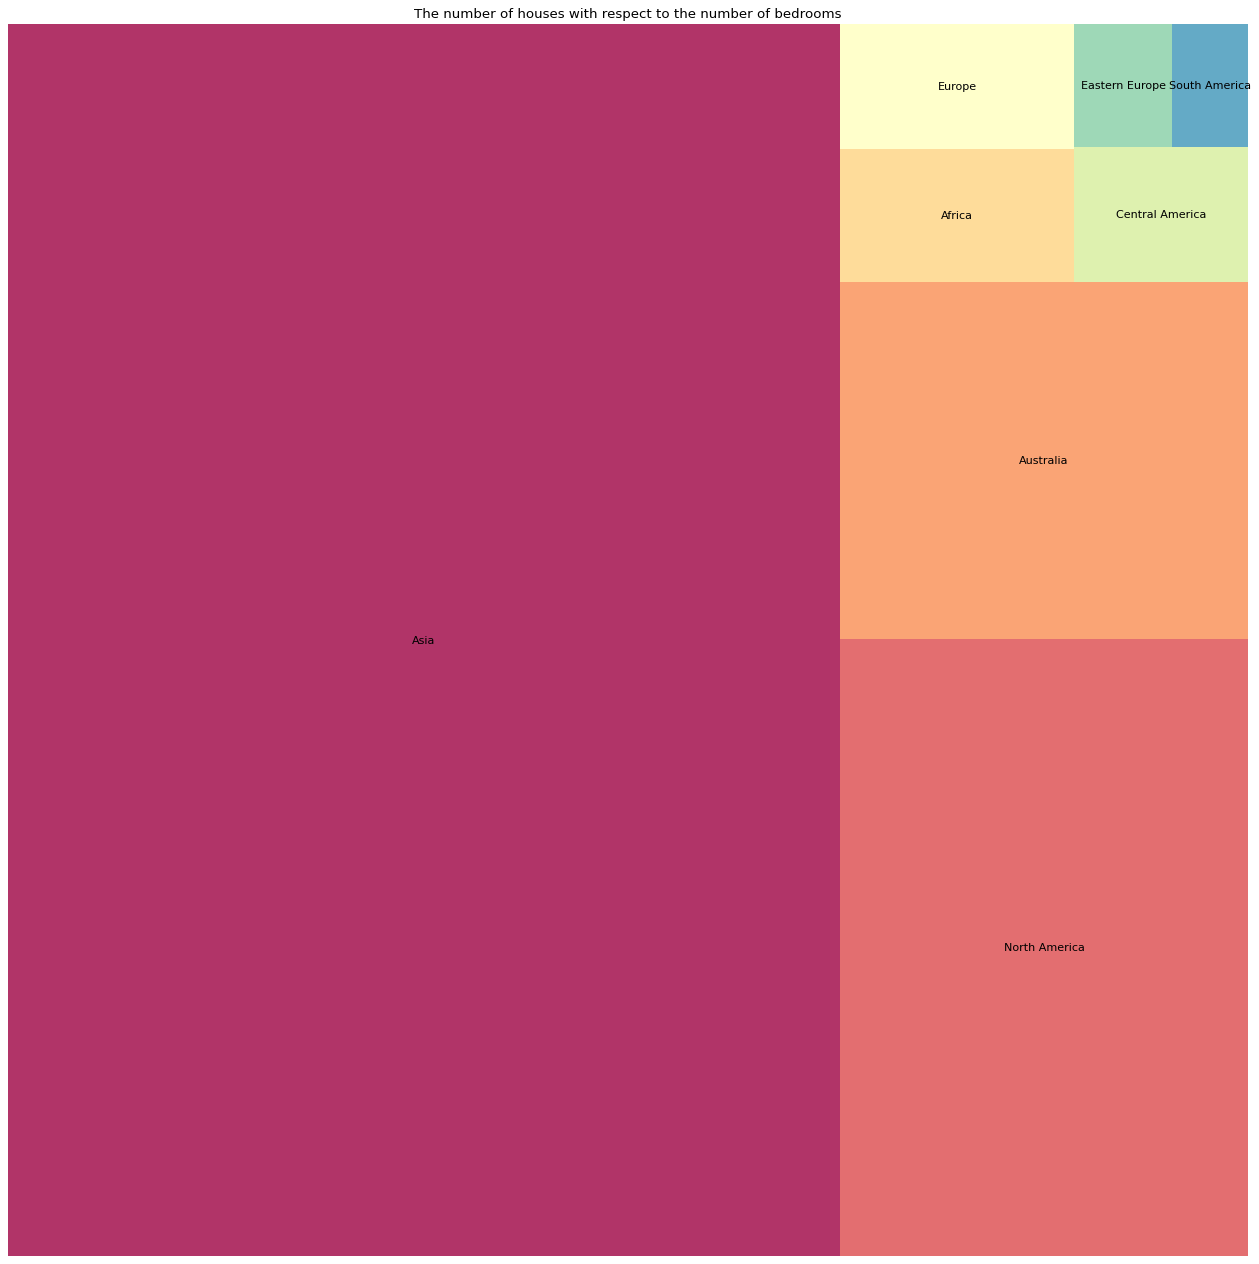

In [143]:
# Assuming 'Market Regions' is the column you want to count
sizes = df['Market Regions'].value_counts().tolist()
labels = df['Market Regions'].unique().tolist()


# Sửa màu tại đây
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(20,20), dpi=80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('The number of houses with respect to the number of bedrooms')
plt.axis('off')
plt.show()

## Brand

In [144]:
df=df[df["Brand"]!="Vertu"]

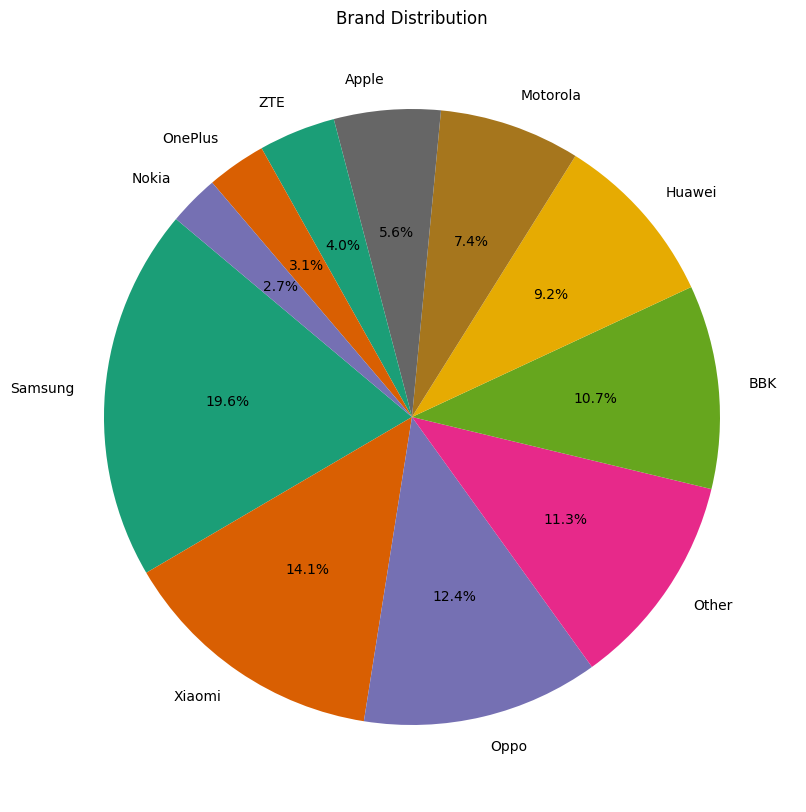

In [145]:
brand_counts=df["Brand"].value_counts()
percentage_threshold = 2  # You can adjust this percentage as needed
threshold = len(df) * (percentage_threshold / 100)

# Filter brands with counts less than the threshold and group them into 'Other'
filtered_brands = brand_counts[brand_counts >= threshold].index
testbrand = df['Brand'].where(df['Brand'].isin(filtered_brands), 'Other')

# Calculate the new brand counts
new_brand_counts = testbrand.value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(new_brand_counts, labels=new_brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Sharp'),
  Text(1, 0, 'Huawei'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'BBK'),
  Text(4, 0, 'Oppo'),
  Text(5, 0, 'Xiaomi'),
  Text(6, 0, 'ZTE'),
  Text(7, 0, 'Apple'),
  Text(8, 0, 'Motorola'),
  Text(9, 0, 'OnePlus'),
  Text(10, 0, 'Nokia'),
  Text(11, 0, 'Sony'),
  Text(12, 0, 'Asus'),
  Text(13, 0, 'Meizu'),
  Text(14, 0, 'Sugar'),
  Text(15, 0, 'Fairphone'),
  Text(16, 0, 'Coolpad'),
  Text(17, 0, 'Google'),
  Text(18, 0, 'Lenovo'),
  Text(19, 0, 'Caterpillar'),
  Text(20, 0, 'Microsoft'),
  Text(21, 0, 'Acer'),
  Text(22, 0, 'TCL'),
  Text(23, 0, 'Kyocera'),
  Text(24, 0, 'FIH'),
  Text(25, 0, 'Reliance'),
  Text(26, 0, 'T-Mobile'),
  Text(27, 0, 'HTC'),
  Text(28, 0, 'Nothing'),
  Text(29, 0, 'Fujitsu'),
  Text(30, 0, 'Wiko'),
  Text(31, 0, 'Blu'),
  Text(32, 0, 'Alcatel'),
  Text(33, 0

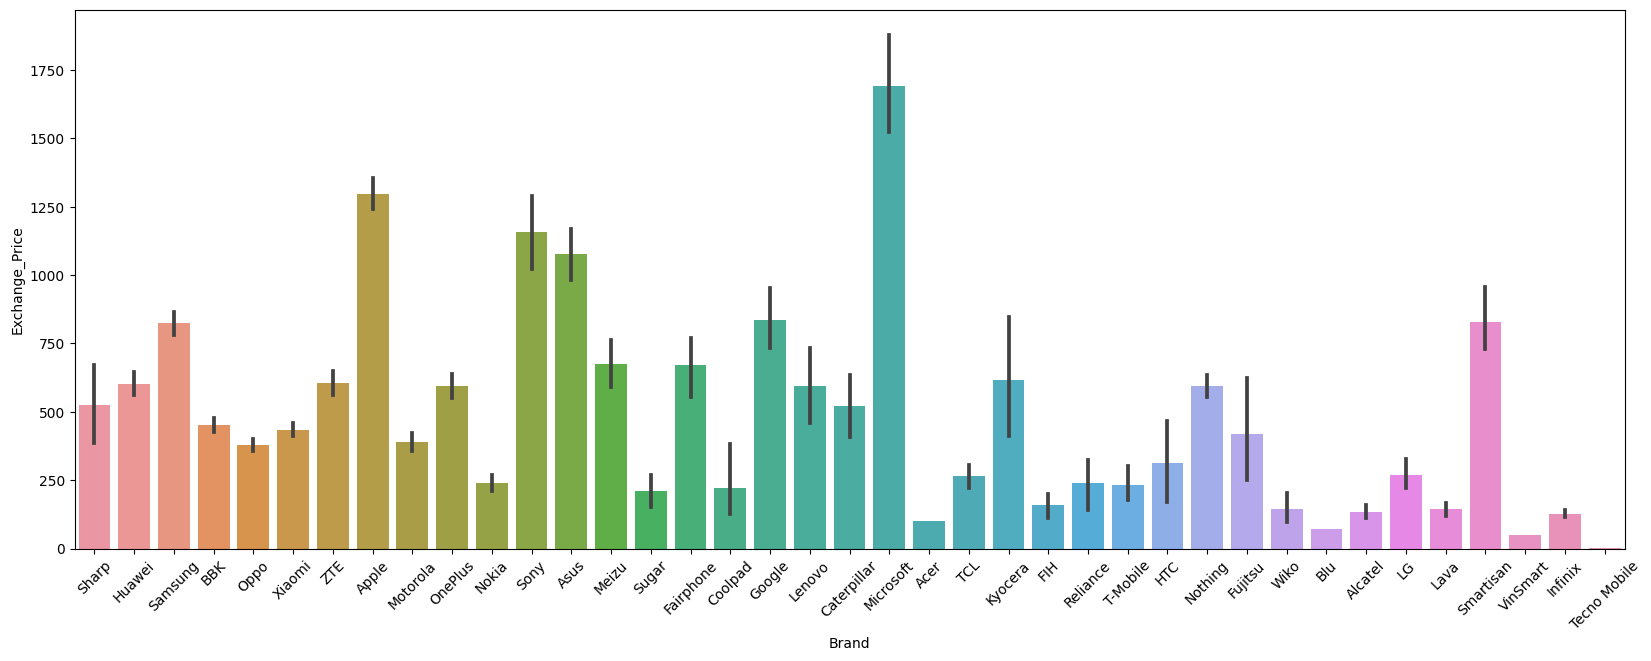

In [146]:
plt.figure(figsize=(20,7))
plot=sns.barplot(x=df["Brand"],y=df["Exchange_Price"])
plt.xticks(rotation=45)


## Touchscreen

In [147]:
df["Touchscreen Type"].value_counts()

True    3918
Name: Touchscreen Type, dtype: int64

## Camera

### Number of effective pixels

In [148]:
df["Number of effective pixels"].value_counts()

48.0     615
50.3     579
50.1     551
13.0     391
63.7     385
12.2     346
108.0    226
64.4     150
12.0     107
64.2      89
108.6     69
8.0       66
15.9      48
201.3     45
53.9      33
49.9      29
13.1      27
64.1      26
64.0      21
39.9      14
4.9       14
16.0      13
100.6      8
40.1       7
159.7      7
57.9       7
199.8      7
63.8       6
24.8       5
5.0        4
32.0       4
12.4       3
20.1       3
12.8       2
47.2       2
11.1       2
12.6       1
48.4       1
23.8       1
13.3       1
16.3       1
24.9       1
22.9       1
Name: Number of effective pixels, dtype: int64

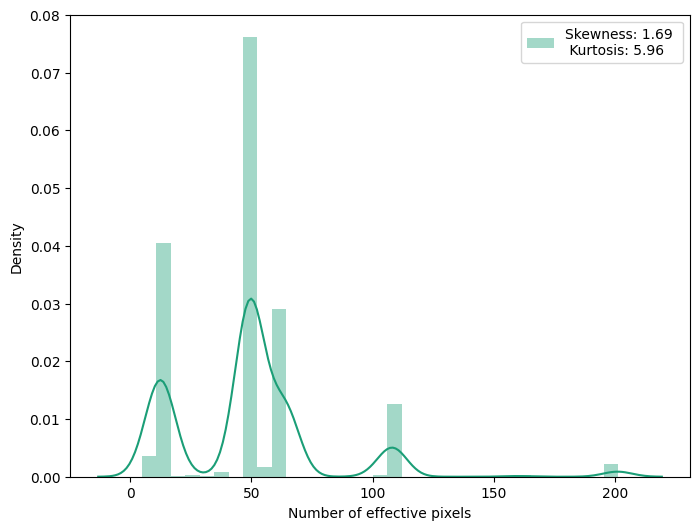

In [149]:
plot_num("Number of effective pixels")

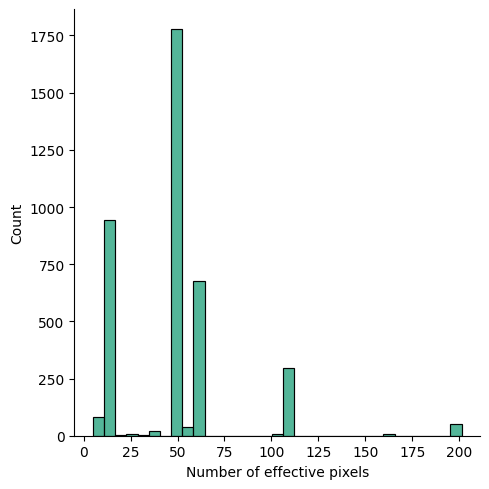

In [150]:
sns.displot(df["Number of effective pixels"])

In [151]:
def categorize_type(value):
    return '0-35' if value < 35 else ('35-70' if value < 70 else '70+')
df['Eff_pixels'] = df['Number of effective pixels'].apply(categorize_type)

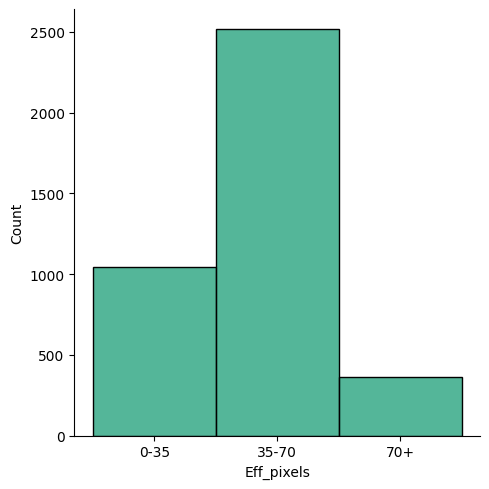

In [152]:
sns.displot(df['Eff_pixels'])

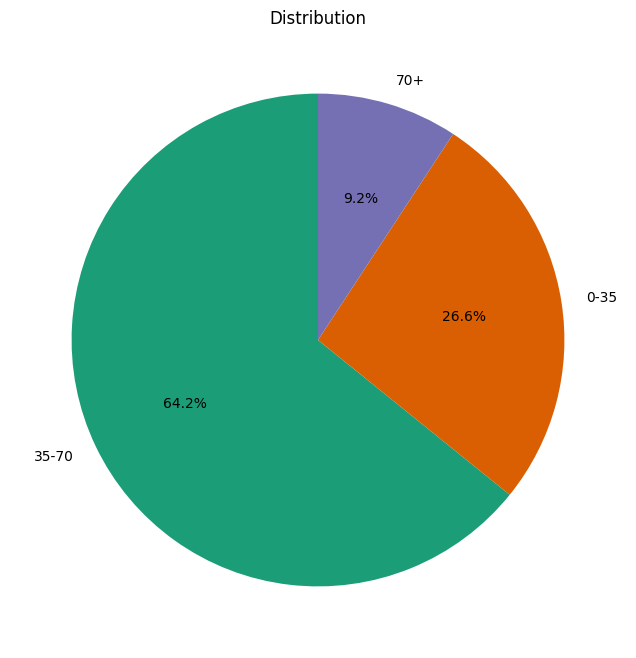

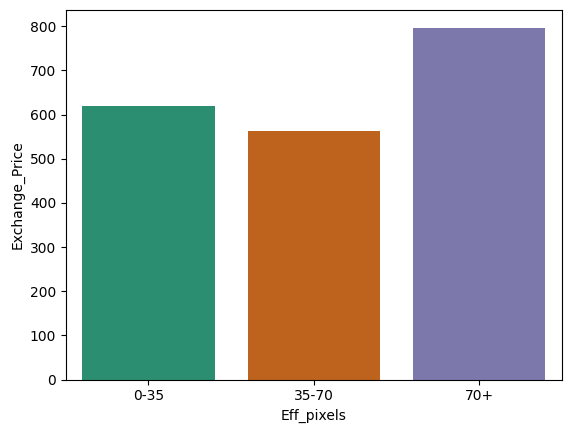

In [153]:
plot_cate("Eff_pixels")

### Video Recording

In [154]:
df["Video Recording"].value_counts()

3840x2160    1696
1920x1080    1342
7680x4320     718
nan            52
4096x2160      33
1280x720       26
3480x2160      17
1920x2160       8
2048x1152       7
5760x3240       6
2520x1440       4
1080x1920       3
4000x3000       2
1080x1080       2
4160x3120       2
Name: Video Recording, dtype: int64

In [155]:
df = df[df["Video Recording"] != 'nan']

In [156]:
df[['X_res_cam', 'Y_res_cam']] = df['Video Recording'].str.split('x', expand=True)
df['X_res_cam'] = pd.to_numeric(df['X_res_cam'])
df['Y_res_cam'] = pd.to_numeric(df['Y_res_cam'])

# Sort the DataFrame by 'X_res_cam' and 'Y_res_cam'
df_sorted = df.sort_values(['X_res_cam', 'Y_res_cam'])

fig = px.scatter_3d(df_sorted, x='X_res_cam', y='Y_res_cam', z='Exchange_Price', color='Exchange_Price', opacity=0.7, size_max=10)

fig.update_layout(scene=dict(xaxis_title='X_res_cam', yaxis_title='Y_res_cam', zaxis_title='Exchange_Price'),
                  title='3D Scatter Plot: X_res_cam, Y_res_cam, and Exchange_Price', width=1200, height=1200)

fig.show()

## Screen

### Display Type

In [157]:
df["Display Type"].value_counts()

AM-OLED display              2345
Color IPS TFT LCD display    1312
Color PLS TFT LCD display     186
Color TN-TFT LCD display       12
Color ASV TFT LCD display      11
Name: Display Type, dtype: int64

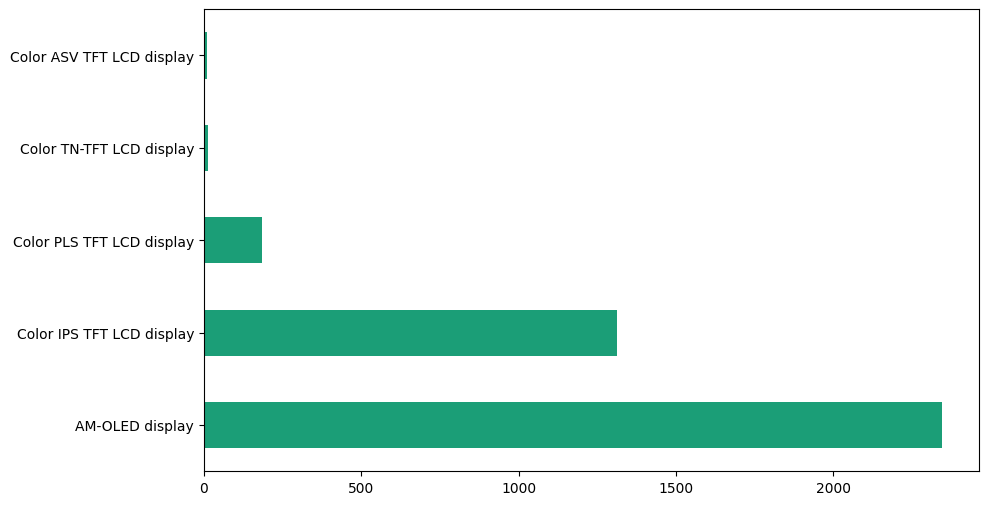

In [158]:
plt.figure(figsize=(10, 6))

df["Display Type"].value_counts(normalize=False).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

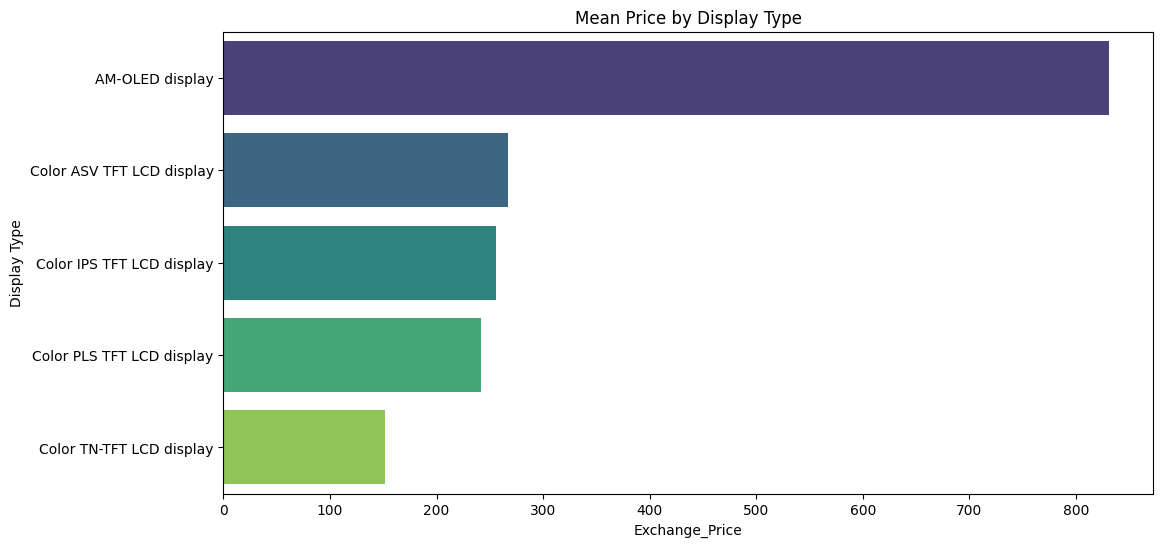

In [159]:
mean_prices_by_display = df.groupby('Display Type')['Exchange_Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Exchange_Price', y='Display Type', data=mean_prices_by_display, palette='viridis')
plt.title('Mean Price by Display Type')
plt.show()

### Resolution

In [160]:
df["Resolution"].value_counts()

1080x2400    1244
720x1600      539
1080x2340     296
1080x2408     199
1440x3200     141
             ... 
1440x3040       1
720x1584        1
540x960         1
1080x1980       1
1080x2220       1
Name: Resolution, Length: 88, dtype: int64

In [161]:
df[['X_res', 'Y_res']] = df['Resolution'].str.split('x', expand=True)
df['X_res'] = pd.to_numeric(df['X_res'])
df['Y_res'] = pd.to_numeric(df['Y_res'])

# Sort the DataFrame by 'X_res' and 'Y_res'
df_sorted = df.sort_values(['X_res', 'Y_res'])

fig = px.scatter_3d(df_sorted, x='X_res', y='Y_res', z='Exchange_Price', color='Exchange_Price', opacity=0.7, size_max=10)

fig.update_layout(scene=dict(xaxis_title='X_res', yaxis_title='Y_res', zaxis_title='Exchange_Price'),
                  title='3D Scatter Plot: X_res, Y_res, and Exchange_Price', width=1200, height=1200)

fig.show()

### Pixel Density

In [162]:
df = df[df["Pixel Density"] != 0]

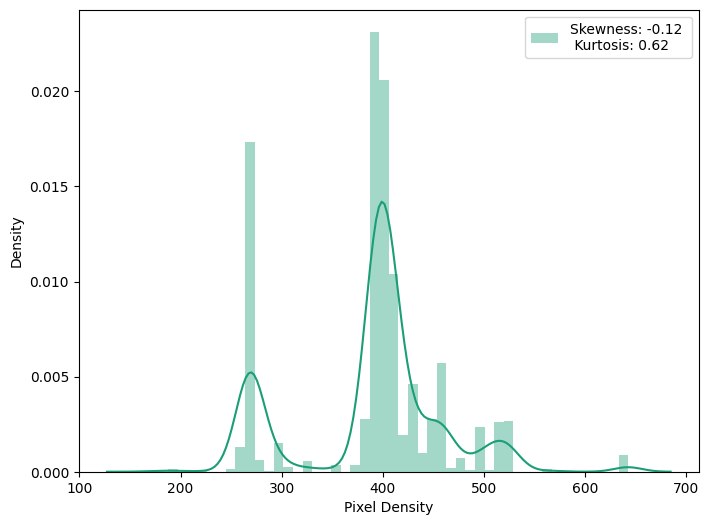

In [163]:
plot_num(column="Pixel Density")

In [164]:
def categorized_type(value):
    return '150-350' if value < 350 else ('350-450' if value < 450 else '450+')
df["pixel"] = df["Pixel Density"].apply(categorized_type)

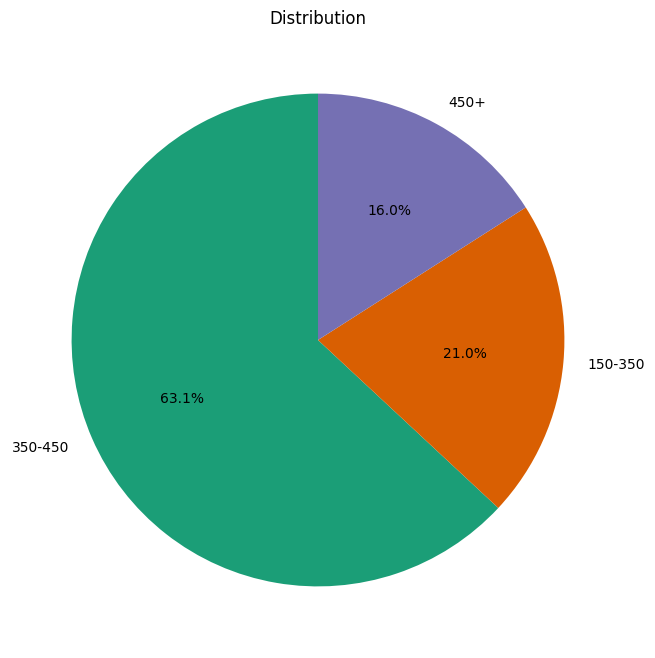

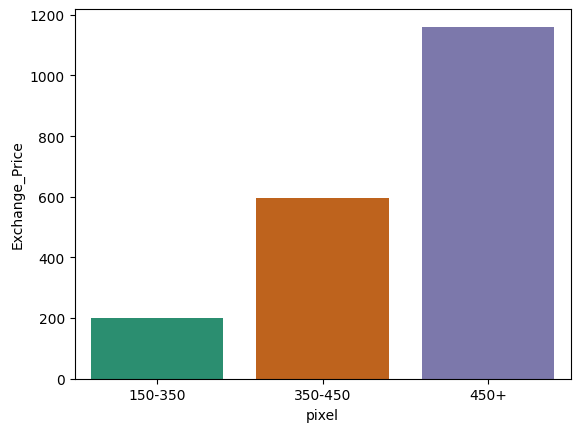

In [165]:
plot_cate("pixel")

### Display Refresh Rate

In [166]:
df["Display Refresh Rate"].value_counts()

120    2330
90      726
60      542
144     209
165      53
240       6
Name: Display Refresh Rate, dtype: int64

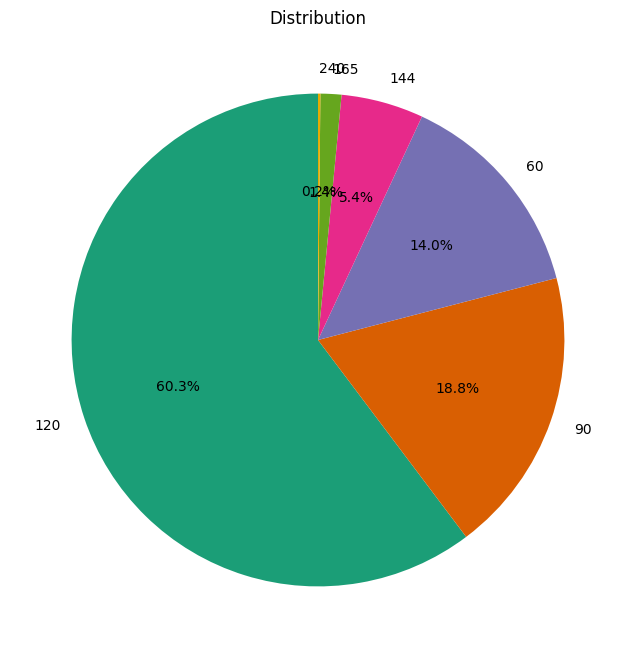

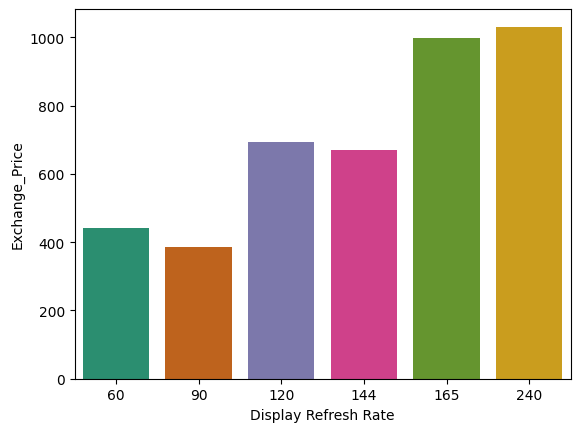

In [167]:
plot_cate("Display Refresh Rate")

## Non-volatile Memory Capacity (ROM)

In [168]:
df.rename(columns={'Non-volatile Memory Capacity (converted)': 'ROM'}, inplace=True)

In [169]:
df["ROM"].value_counts()

128.0     1622
256.0     1130
64.0       494
512.0      316
32.0       222
1000.0      56
16.0        23
640.0        1
8.0          1
236.8        1
Name: ROM, dtype: int64

Drop outliers

In [170]:
df["ROM"]=df["ROM"].astype(float)
df = df[df["ROM"].isin(df["ROM"].value_counts()[df["ROM"].value_counts() > 1].index)]

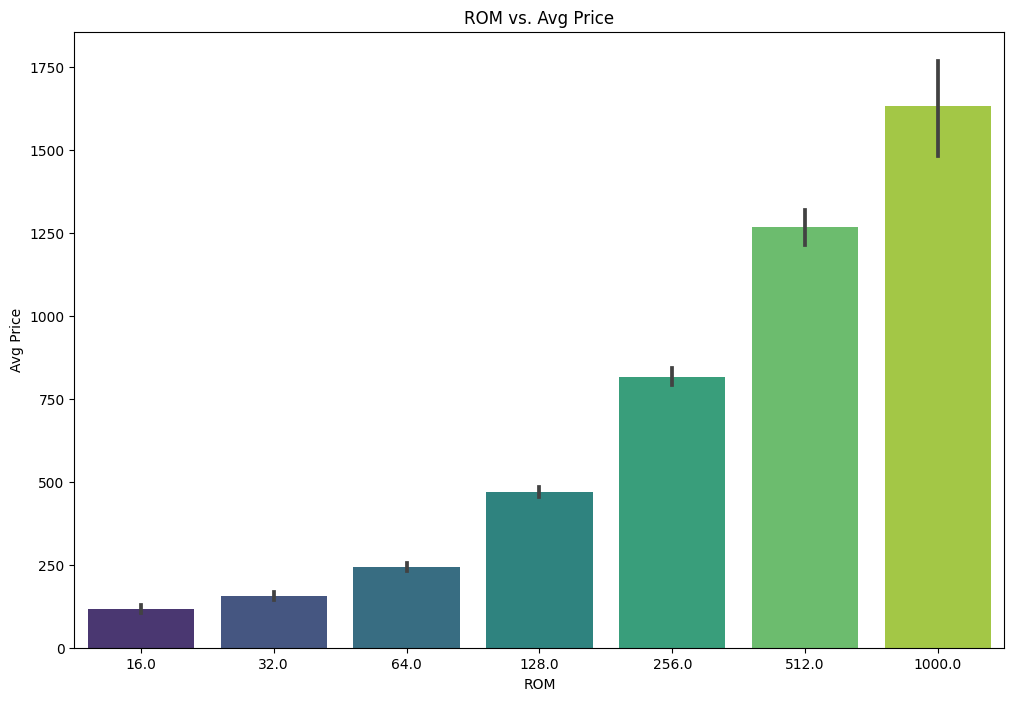

In [171]:
ROM_groupby= df.groupby(['ROM']).agg(
    {'Exchange_Price': 'mean'}
).reset_index()

plt.figure(figsize=(12, 8))
plt.plot(ROM_groupby["ROM"], ROM_groupby["Exchange_Price"], marker='o', color='red', label='Trend')
sns.barplot(x='ROM', y='Exchange_Price', data=df, palette='viridis')
plt.xlabel('ROM')
plt.ylabel('Avg Price')
plt.title('ROM vs. Avg Price')
plt.show()


## RAM Capacity

In [172]:
df["RAM Capacity (converted)"].value_counts()

8.0     1333
4.0      729
6.0      715
12.0     646
3.0      162
2.0      128
16.0     119
18.0      16
1.0       15
Name: RAM Capacity (converted), dtype: int64

In [173]:
df.rename(columns={"RAM Capacity (converted)":"RAM"},inplace=True)
df["RAM"]=df["RAM"].astype("int64")

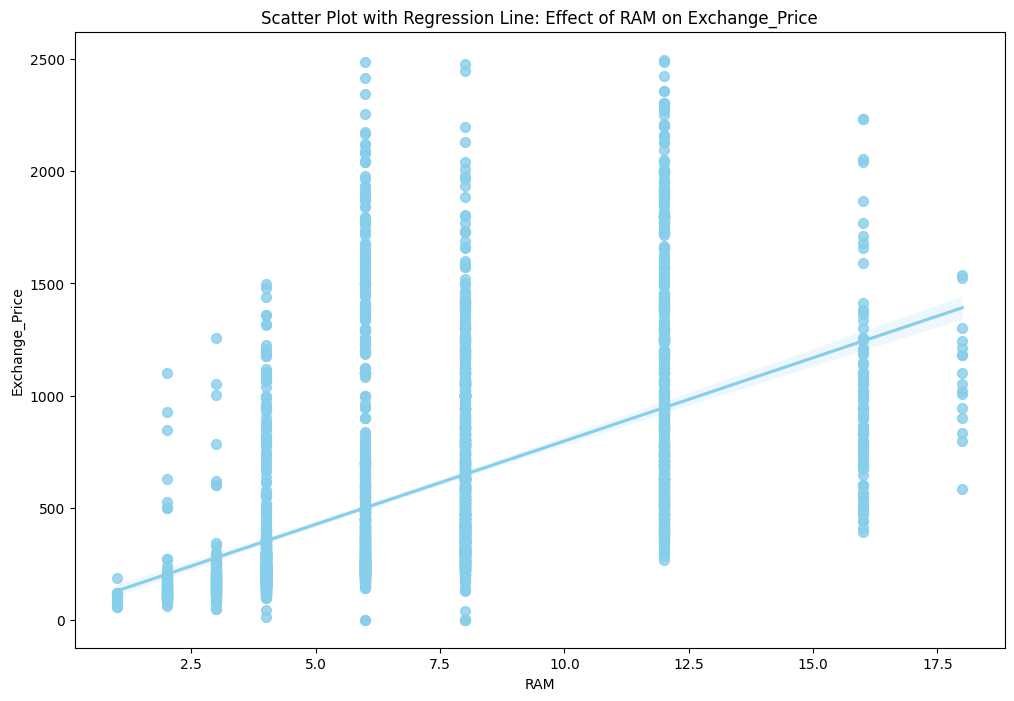

In [174]:
plt.figure(figsize=(12, 8))

sns.regplot(x='RAM', y='Exchange_Price', data=df, color='skyblue', scatter_kws={'s': 50})

plt.xlabel('RAM')
plt.ylabel('Exchange_Price')
plt.title('Scatter Plot with Regression Line: Effect of RAM on Exchange_Price')
plt.show()

## Nominal Battery Capacity

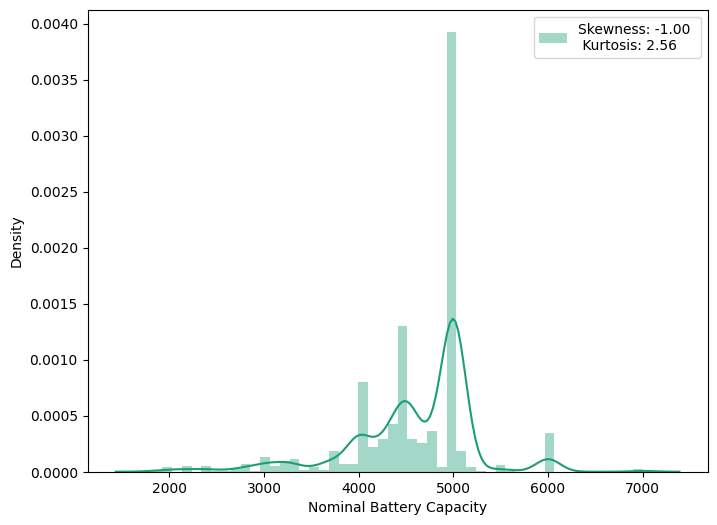

In [175]:
plot_num(column="Nominal Battery Capacity")

<AxesSubplot:xlabel='Nominal Battery Capacity', ylabel='Exchange_Price'>

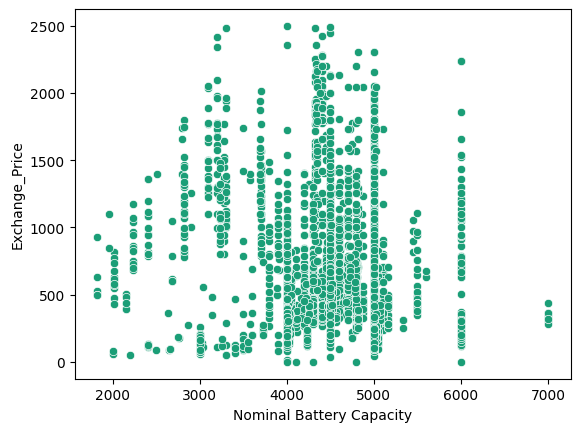

In [176]:
sns.scatterplot(data=df,x='Nominal Battery Capacity',y='Exchange_Price')

In [177]:
df["Nominal Battery Capacity"]=df["Nominal Battery Capacity"].astype("int64")

## CPU Clock

In [178]:
df["CPU Name"]=df["CPU"].apply(lambda x: " ".join(x.split()[:2]))
df.head(5)

,Model,Secondary Display Type,Wireless Charging,Platform,Device Category,Brand,Touchscreen Type,CPU,Number of effective pixels,Resolution,...,Width,Height,Exchange_Price,Eff_pixels,X_res_cam,Y_res_cam,X_res,Y_res,pixel,CPU Name
0,Basio active 5G TD-LTE JP 64GB SHG09,False,False,Android,Smartphone,Sharp,True,"Qualcomm Snapdragon 695 5G SM6375, 2021, 64 bi...",12.0,720x1520,...,71.0,158.0,468.6500,0-35,1920,1080,720,1520,150-350,Qualcomm Snapdragon
1,P60 Pro 4G Premium Edition Dual SIM TD-LTE CN ...,False,True,Android,Smartphone,Huawei,True,Qualcomm Snapdragon 8+ Gen 1 4G SM8475 (Palima...,48.0,1220x2700,...,74.5,161.0,1257.2856,35-70,3840,2160,1220,2700,350-450,Qualcomm Snapdragon
3,SM-A146U Galaxy A14 5G 2023 Standard Edition T...,False,False,Android,Smartphone,Samsung,True,"MediaTek Dimensity 700 MT6833V/ZA, 2020, 64 bi...",50.1,1080x2408,...,78.0,167.7,199.9900,35-70,1920,1080,1080,2408,350-450,MediaTek Dimensity
5,Realme 9 Pro+ 5G 2022 Premium Edition Dual SIM...,False,False,Android,Smartphone,Oppo,True,"MediaTek Dimensity 920 MT6877V/TZA, 2022, 64 b...",50.3,1080x2400,...,73.3,160.2,361.7866,35-70,3840,2160,1080,2400,350-450,MediaTek Dimensity
6,Black Shark 5 Pro 5G Standard Edition Dual SIM...,False,False,Android,Smartphone,Xiaomi,True,Qualcomm Snapdragon 8 Gen 1 5G SM8450 (Waipio)...,108.0,1080x2400,...,76.35,163.83,550.0428,70+,3840,2160,1080,2400,350-450,Qualcomm Snapdragon


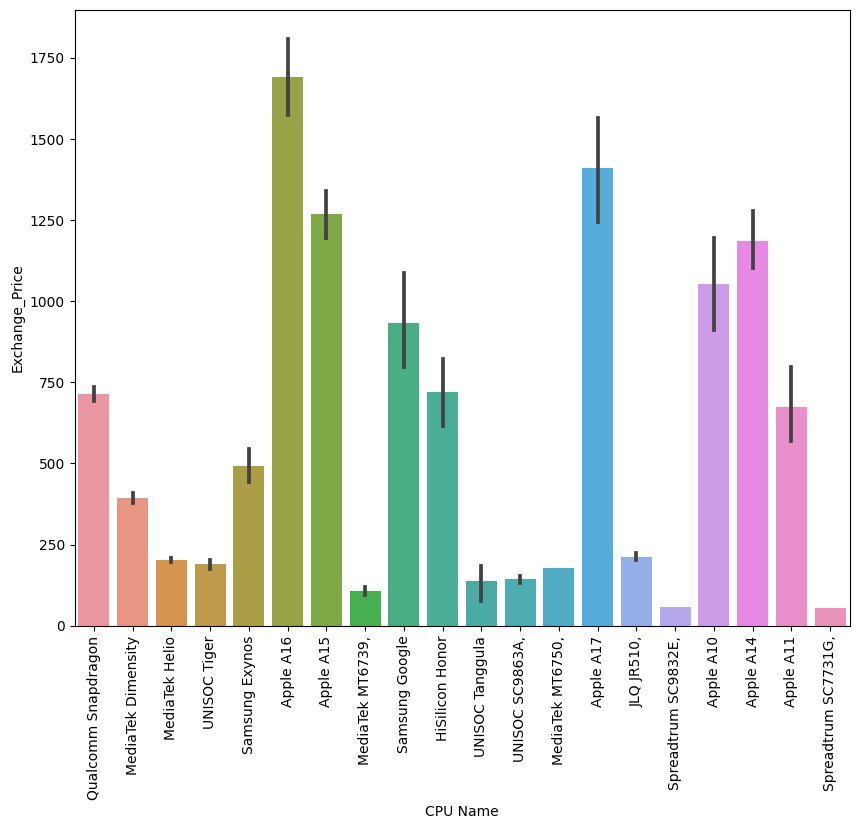

In [179]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["CPU Name"],y=df["Exchange_Price"])
plt.xticks(rotation=90)
plt.show()

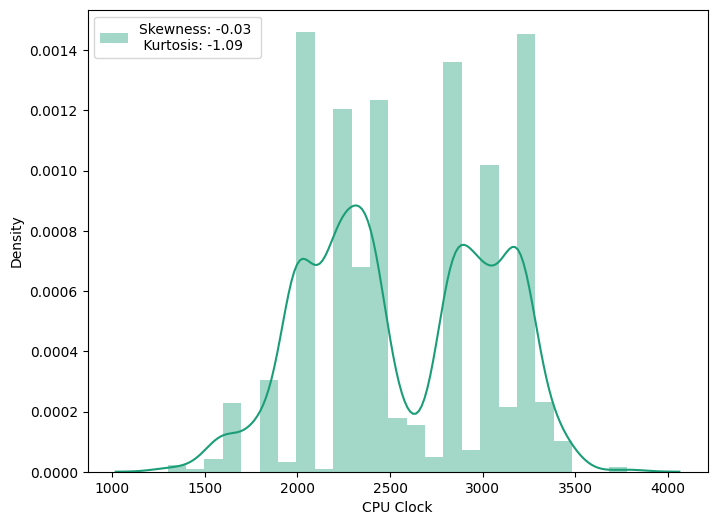

In [180]:
plot_num("CPU Clock")

<AxesSubplot:xlabel='CPU Clock', ylabel='Exchange_Price'>

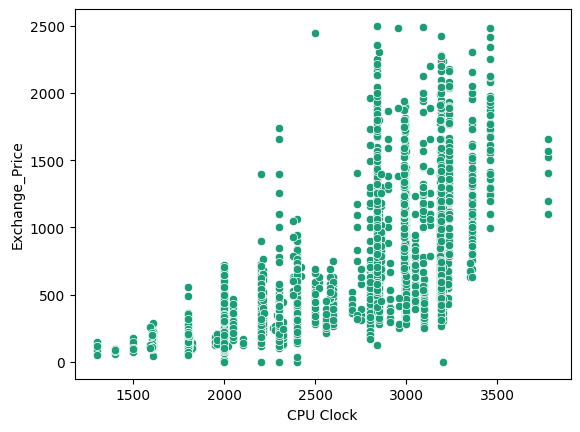

In [181]:
sns.scatterplot(data=df,x='CPU Clock',y='Exchange_Price')

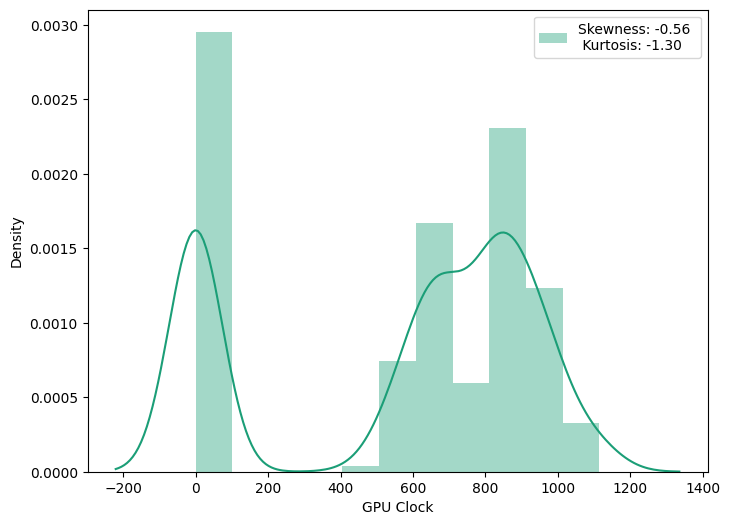

In [182]:
plot_num("GPU Clock")

<AxesSubplot:xlabel='GPU Clock', ylabel='Exchange_Price'>

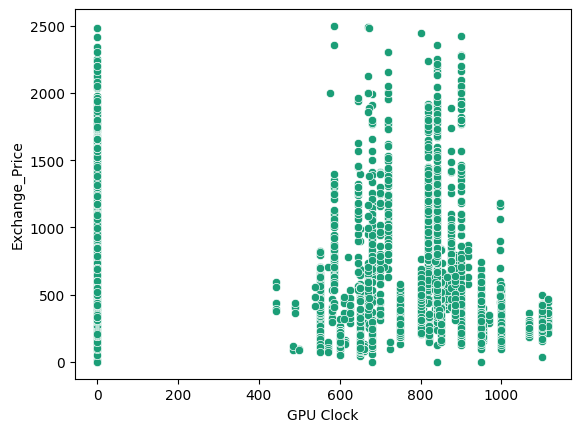

In [183]:
sns.scatterplot(data=df,x='GPU Clock',y='Exchange_Price')

## Bluetooth

In [184]:
df["Bluetooth"].value_counts()

Bluetooth 5.0    1185
Bluetooth 5.2    1046
Bluetooth 5.1     926
Bluetooth 5.3     552
Bluetooth 4.2     148
Bluetooth 4.1       5
Bluetooth 4.0       1
Name: Bluetooth, dtype: int64

In [185]:
blue_df=df["Bluetooth"].str.split(' ').str[1]
blue_df=blue_df.astype("float")
blue_df.head()

0    5.1
1    5.2
3    5.2
5    5.2
6    5.2
Name: Bluetooth, dtype: float64

In [186]:
blue_df.value_counts()

5.0    1185
5.2    1046
5.1     926
5.3     552
4.2     148
4.1       5
4.0       1
Name: Bluetooth, dtype: int64

In [187]:
def categorize_version(value):
    if value < 4.4:
        return '4.x'
    elif value == 5.0:
        return '5.0'
    elif value == 5.1:
        return '5.1'
    elif value == 5.2:
        return '5.2'
    elif value == 5.3:
        return '5.3'
blue_df= blue_df.apply(categorize_version)
df["Bluetooth"]=blue_df

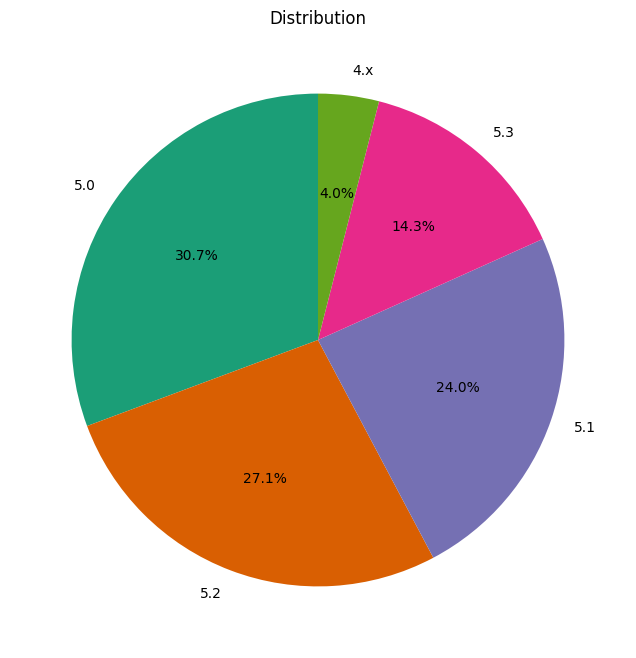

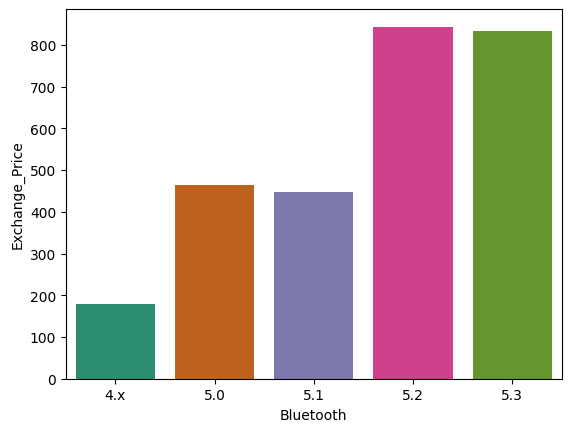

In [188]:
plot_cate("Bluetooth")

## IR

In [189]:
df["IR"].value_counts()

False    3160
True      703
Name: IR, dtype: int64

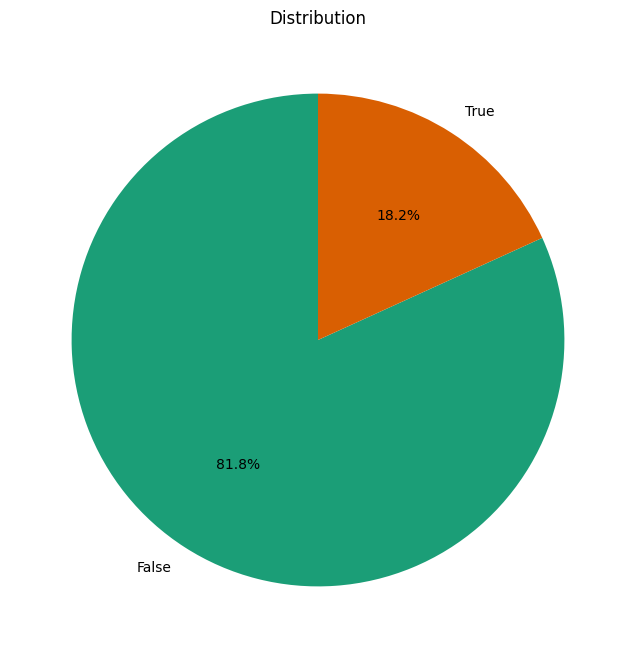

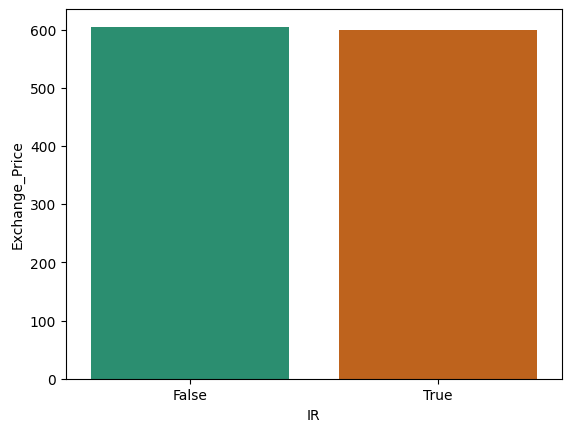

In [190]:
plot_cate("IR")

## Sec. SIM Card Slot

In [191]:
df["Sec. SIM Card Slot"].value_counts()

True     3103
False     760
Name: Sec. SIM Card Slot, dtype: int64

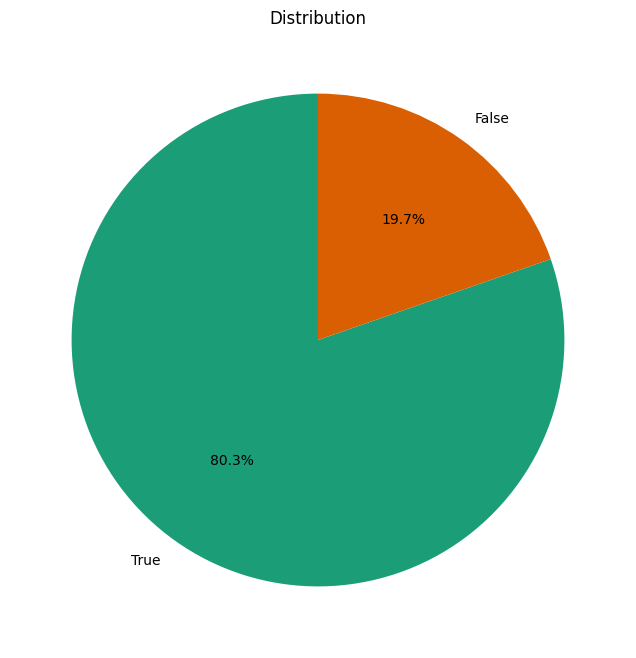

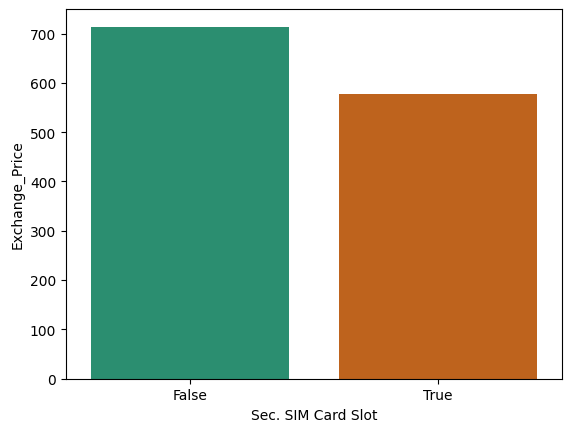

In [192]:
plot_cate("Sec. SIM Card Slot")

## Mass

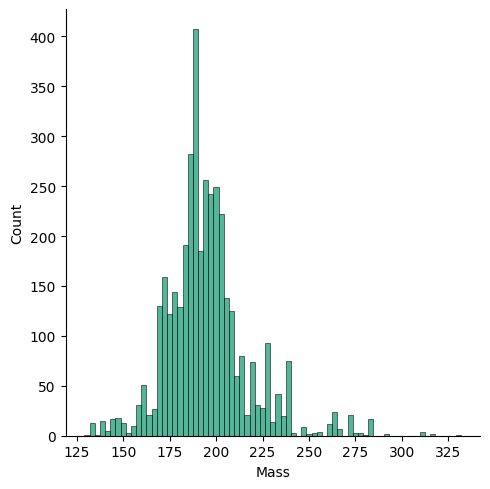

In [193]:
sns.displot(df["Mass"])

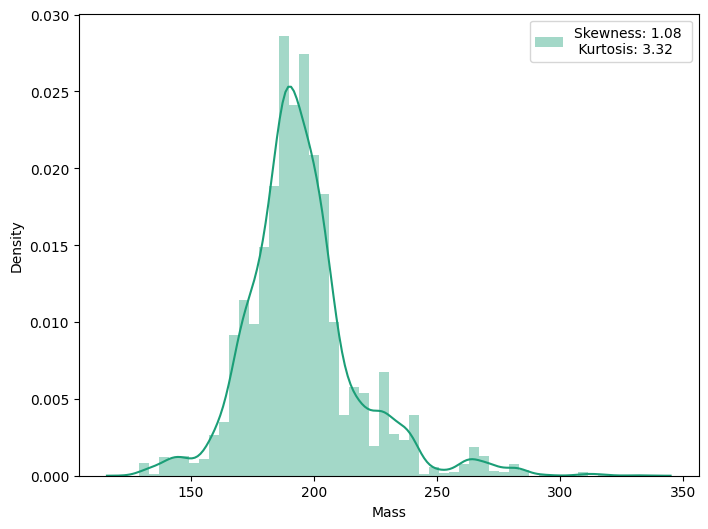

In [194]:
plot_num("Mass")

<AxesSubplot:xlabel='Mass', ylabel='Exchange_Price'>

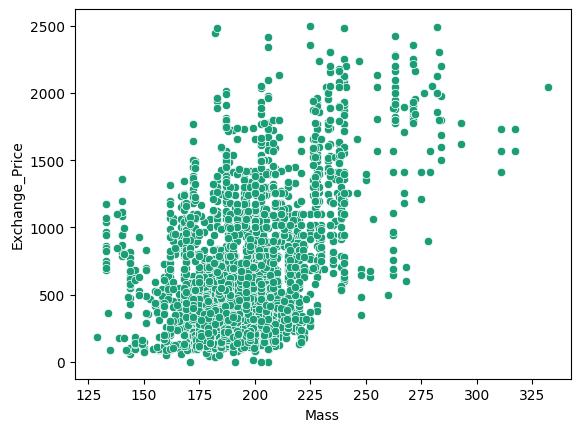

In [195]:
sns.scatterplot(df, x="Mass",y="Exchange_Price")

## Released

In [196]:
df["Released"].value_counts()

2022-03-01    115
2022-09-01     91
2022-04-01     82
2021-09-24     79
2022-12-01     76
             ... 
2020-07-09      1
2021-10-11      1
2021-02-11      1
2021-03-06      1
2020-06-06      1
Name: Released, Length: 523, dtype: int64

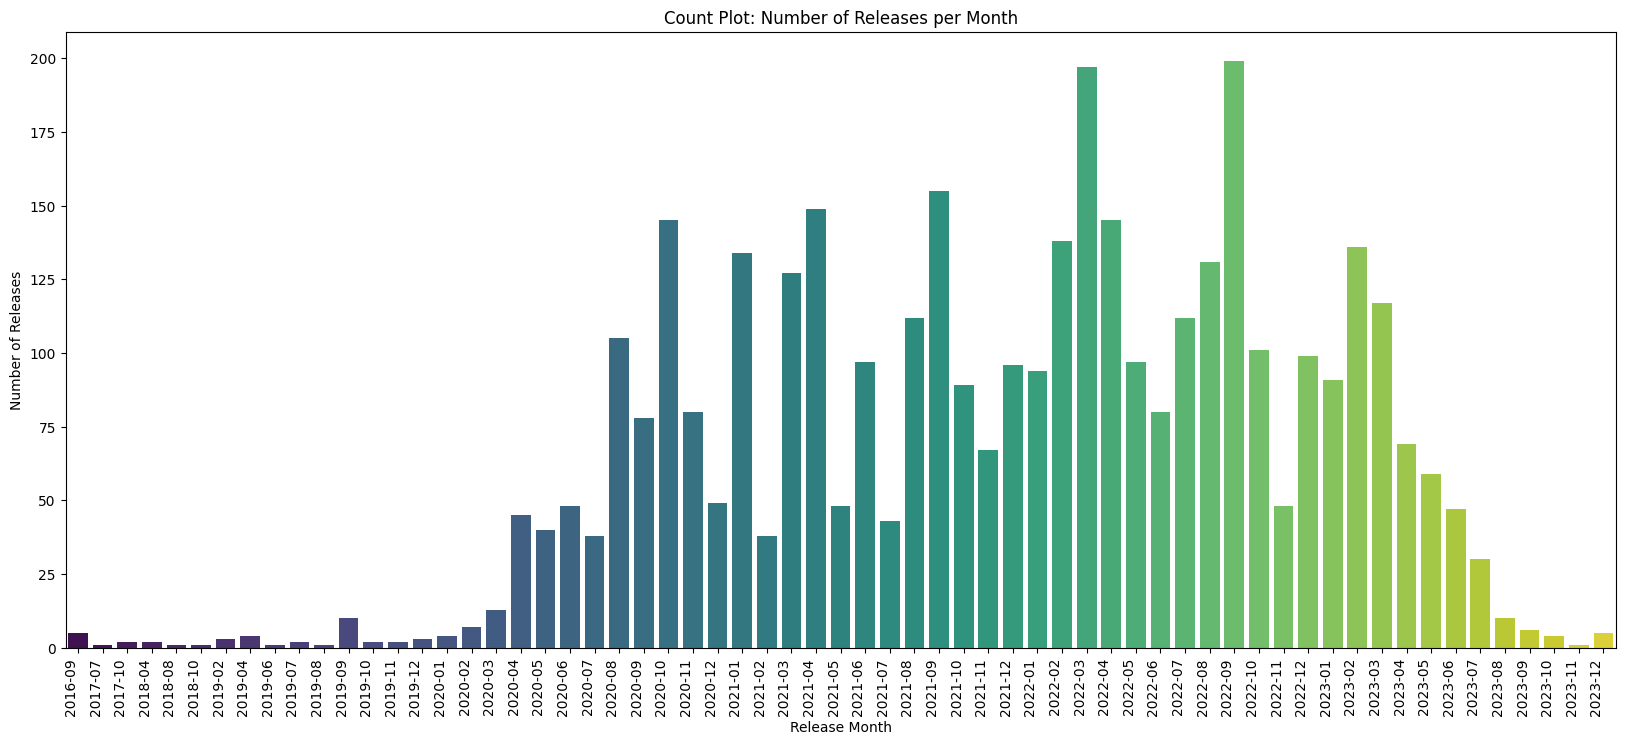

In [197]:
plt.figure(figsize=(20, 8))
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')
df = df.sort_values(by='Released')
sns.countplot(x=df["Released"].dt.to_period("M"), palette='viridis')
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.title('Count Plot: Number of Releases per Month')
plt.xticks(rotation=90, ha='right')
plt.show()

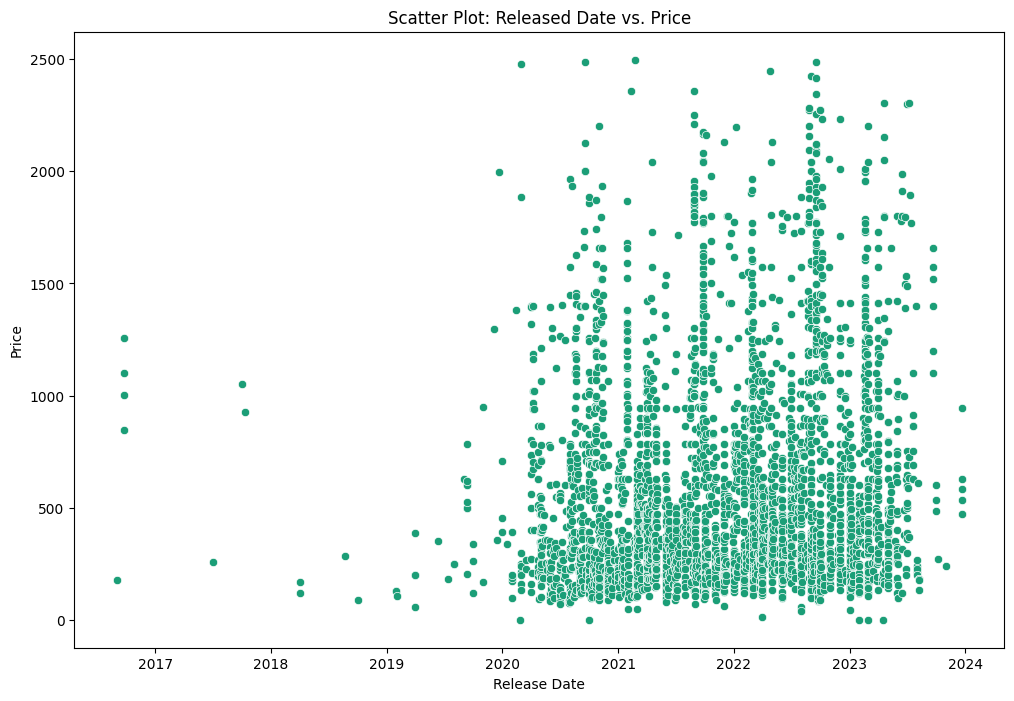

In [198]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Released'], y=df['Exchange_Price'], palette='viridis')
plt.xlabel('Release Date')
plt.ylabel('Price')
plt.title('Scatter Plot: Released Date vs. Price')
plt.show()

In [199]:
df['ReleaseMonth'] = df['Released'].dt.to_period("Y")
df["ReleaseMonth"].value_counts()

2022    1441
2021    1155
2020     652
2023     575
2019      28
2016       5
2018       4
2017       3
Freq: A-DEC, Name: ReleaseMonth, dtype: int64

['Samsung', 'Xiaomi', 'Oppo', 'BBK', 'Huawei', 'Motorola']


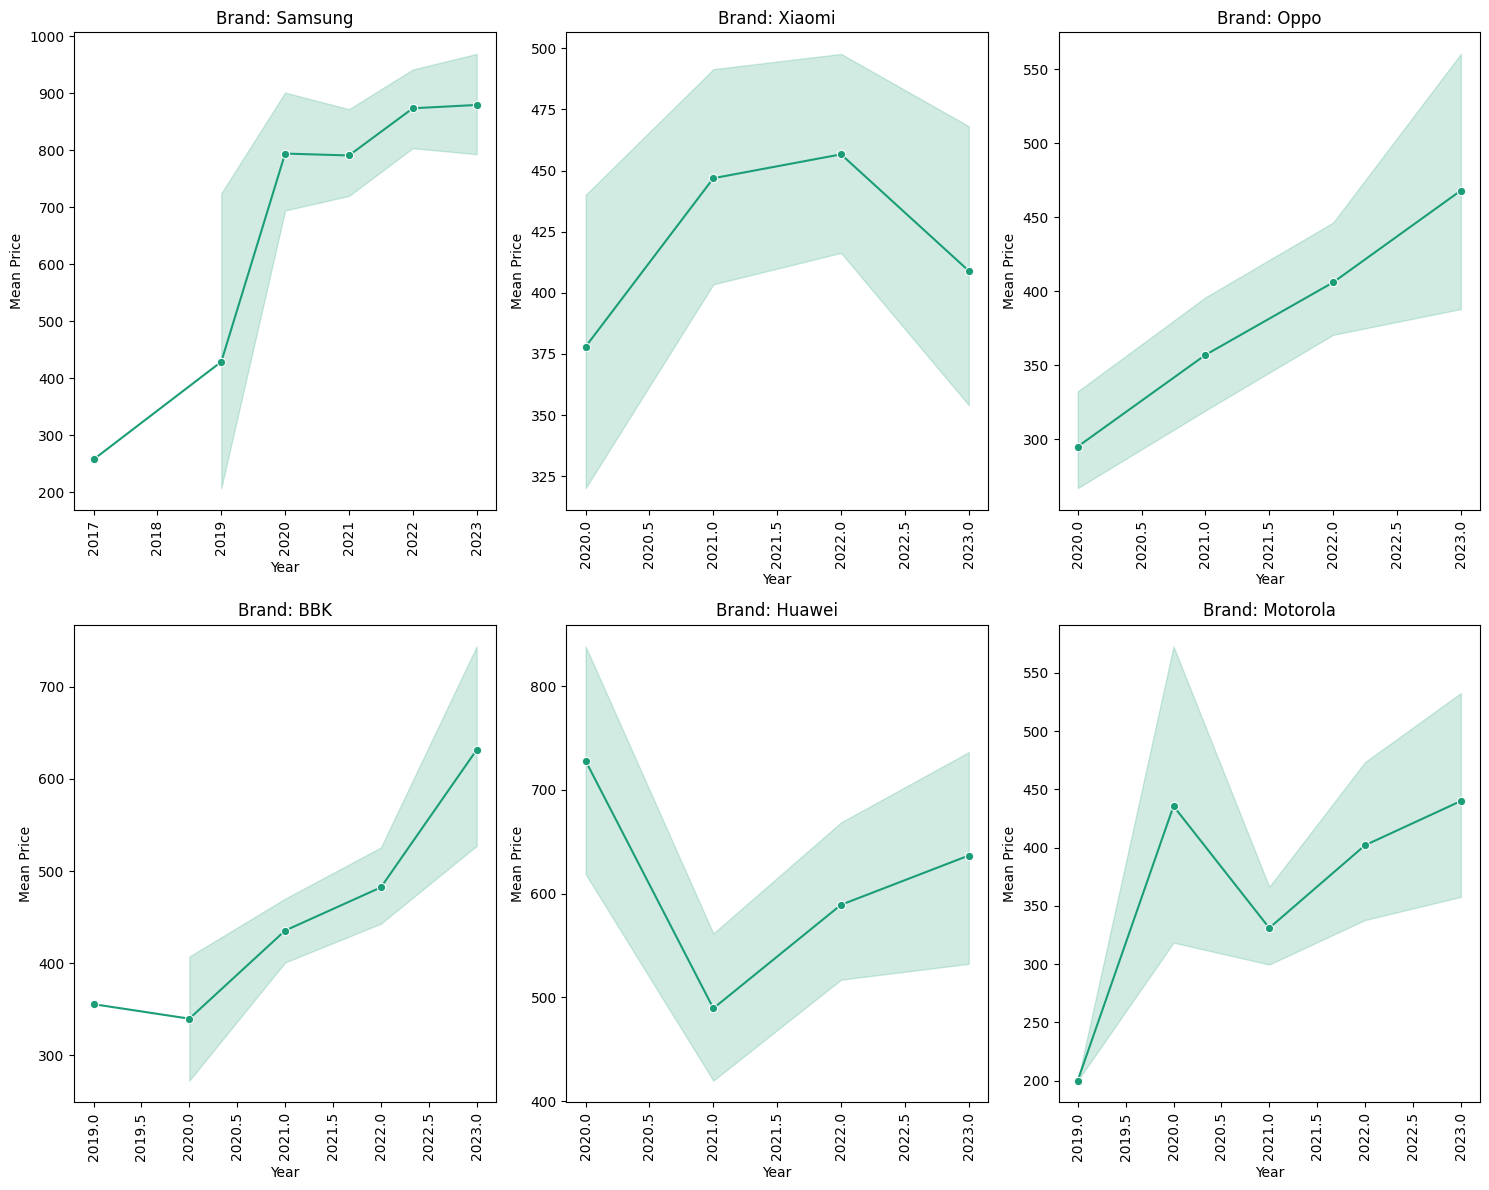

In [200]:
df['Released'] = pd.to_datetime(df['Released'])
df['ReleaseYear'] = df['Released'].dt.year
top_brands = df['Brand'].value_counts().head(6).index.tolist()
print(top_brands)

plt.figure(figsize=(15, 12))

for i, brand in enumerate(top_brands, 1):
    plt.subplot(2, 3, i)
    brand_data = df[df['Brand'] == brand]
    sns.lineplot(x='ReleaseYear', y='Exchange_Price', data=brand_data, estimator='mean', marker='o')
    plt.title(f'Brand: {brand}')
    plt.xlabel('Year')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Attributes Selection

In [201]:
selected_col = [
    'Secondary Display Type',
    'Wireless Charging',
    'Platform',
    'Market Regions',
    'Brand',
    'Display Type',
    'Resolution',
    'Video Recording',
    'Pixel Density',
    'Display Refresh Rate',
    'ROM',
    'RAM',
    'CPU Name',
    'CPU Clock',
    'Bluetooth',
    'Exchange_Price'
]



In [202]:
df.columns

Index(['Model', 'Secondary Display Type', 'Wireless Charging', 'Platform',
       'Device Category', 'Brand', 'Touchscreen Type', 'CPU',
       'Number of effective pixels', 'Resolution', 'Pixel Density',
       'Market Regions', 'Zoom', 'Display Type', 'ROM', 'IR', 'RAM',
       'Nominal Battery Capacity', 'Released', 'GPU Clock',
       'Display Refresh Rate', 'CPU Clock', 'Video Recording', 'Bluetooth',
       'Sec. SIM Card Slot', 'Mass', 'Depth', 'Width', 'Height',
       'Exchange_Price', 'Eff_pixels', 'X_res_cam', 'Y_res_cam', 'X_res',
       'Y_res', 'pixel', 'CPU Name', 'ReleaseMonth', 'ReleaseYear'],
      dtype='object')

In [203]:
ml_df = df[selected_col]
ml_df.to_csv("ml_df.csv", index=False)

In [204]:
ml_df.shape

(3863, 16)